## Домашнее задание "Продвинутая линейная алгебра"

### Уровень 0

Придумайте матрицы, которые обладают следующими свойствами

(во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!)

In [1]:
import numpy as np

a) Диагональная, ортогональная, но не единичная(!)

In [2]:
# для всех 3-х пунктов: для проверки ортогональности
# заданную матрицу умножим на транспонированную к ней матрицу,
# в результате получим единичную

# выразим угол 360 градусов через Пи
p = 2 * np.pi

# создадим матрицу
a = np.array([[np.cos(p),0,0],
            [0,np.cos(p),0],
            [0,0,np.cos(p)]])
print(p)
print()
print(a)

6.283185307179586

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
# сделаем проверку

a.T @ a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

b) Верхнетреугольная, ортогональная

In [4]:
b = np.triu([[1,0,0],[5,-1,0],[7,1,1]],0)
b

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  1]])

In [5]:
b @ b.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

c) Нижнетреугольная, ортогональная

In [6]:
c = np.tril([[1,7,1],[0,-1,5],[0,0,-1]],0)
c

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [7]:
c @ c.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [8]:
d = np.array([[1,1,2],[1,1,1],[1,2,1]])
d

array([[1, 1, 2],
       [1, 1, 1],
       [1, 2, 1]])

In [9]:
# проверим определитель - он равен 1

np.linalg.det(d)

1.0

Найдите собственные значения и собственные вектора матриц:



In [10]:
m = np.array([[2, 2], [1, 3]])

print(m)

[[2 2]
 [1 3]]


In [11]:
val,vec = np.linalg.eig(m)

for i in range(len(val)):
    print('Собственному значению ', val[i])
    print('соответствует собственный вектор', vec[i])
    print()

Собственному значению  1.0
соответствует собственный вектор [-0.89442719 -0.70710678]

Собственному значению  4.0
соответствует собственный вектор [ 0.4472136  -0.70710678]



### Уровень 1

Найдите спектральное разложение матрицы:

In [12]:
n = np.array([[1, 2], [2,3]]) 
print(n)

[[1 2]
 [2 3]]


In [13]:
# спектральное разложение - это представление в виде S x D x S^T,
# где S матрица собственных векторов, S^T она же транспонированная, а
# D - диагональная матрица из собственных значений.
# т.к. исходная матрица симметрична, разложение можно выполнить

# найдем собственные значения и собственные векторы

d,S = np.linalg.eig(n)
print('Собственные значения:\n',d)
print()
print('Матрица собственных векторов S:\n',S)

Собственные значения:
 [-0.23606798  4.23606798]

Матрица собственных векторов S:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [14]:
# преобразуем вектор собственных значений в диагональную матрицу

D = np.diag(d)
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [15]:
# спектральное разложение выполнено
# проверим это, найдя произведение трех матриц (получим исходную)

S @ D @ S.T

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

**У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.*

In [16]:
# импортируем рукописные цифры

from sklearn.datasets import load_digits

In [17]:
# определим матрицу признаков (Х) и вектор меток (у)

X, y = load_digits(return_X_y=True)

In [18]:
# их размерность

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [19]:
# разделим данные на обучающую и тестовую выборки (пусть будет 70х30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [20]:
# в задаче предлагалось использовать MSE
# т.к. это оценка для задач регрессии, импортируем, например,
# метод опорных векторов

from sklearn.svm import SVR
svr = SVR()

svr.fit(X_train,y_train)

SVR()

In [21]:
# качество модели оценим по r_2_score (чем ближе к 1, тем лучше)

from sklearn.metrics import r2_score

r2_score(y_test, svr.predict(X_test))

0.820689106487569

In [22]:
# импортируем алгоритм PCA, снизим размерность матрицы до 32-х компонент (из 64-х) и
# восстановим исходные данные (с потерей информации)

from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_32 = pca.fit_transform(X)
X_32 = pca.inverse_transform(X_32)

In [23]:
# повторим шаги по выборкам, модели и оценке

X_32_train, X_32_test, y_train, y_test = train_test_split(X_32,y, test_size=0.3)

In [24]:
svr.fit(X_32_train,y_train)

SVR()

In [25]:
r2_score(y_test, svr.predict(X_32_test))

0.8601948926546323

In [26]:
# теперь сделаем то же самое, но в цикле, и получим список оценок r2_score
# т.к. исходное кол-во признаков 64, n_component увеличиваем каждый раз на 8

array_r_2 = []

for i in range(8,len(X[1]), 8):
    
    pca = PCA(n_components=i)
    X_new = pca.fit_transform(X)
    X_new = pca.inverse_transform(X_new)

    X_new_train, X_new_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3)
    svr.fit(X_new_train,y_train)

    r_2 = r2_score(y_test, svr.predict(X_new_test))

    array_r_2.append(r_2)

    print('при n_components =', i)
    print('r_2_score =',r_2)
    print()
    
print(array_r_2)

при n_components = 8
r_2_score = 0.6558076581379947

при n_components = 16
r_2_score = 0.8197387181836675

при n_components = 24
r_2_score = 0.8335771711636734

при n_components = 32
r_2_score = 0.8504218610291657

при n_components = 40
r_2_score = 0.8340778755804115

при n_components = 48
r_2_score = 0.834020418198706

при n_components = 56
r_2_score = 0.8299831878631033

[0.6558076581379947, 0.8197387181836675, 0.8335771711636734, 0.8504218610291657, 0.8340778755804115, 0.834020418198706, 0.8299831878631033]


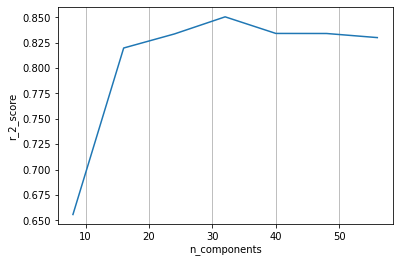

In [27]:
# представим графически рассчитанные оценки

import matplotlib.pyplot as plt

# зададим список выбранных n_components
axis_x = [8,16,24,32,40,48,56]

# построим график
plt.plot(axis_x, array_r_2)

plt.xlabel('n_components')
plt.ylabel('r_2_score')
plt.grid(axis='x')

In [28]:
# рассчитаем среднее значение полученных оценок

round(np.mean(array_r_2), 3)

0.808